In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
def extract_mem(s):
    try:
        return float(s.split("MB")[0])
    except:
        return f'Not applicable'
    
def extract_time(s):
    try:
        return float(s.split("s")[0])
    except:
        return f'Not applicable'
    
config = pd.read_csv('./exploratory_analysis.csv')
config.columns
config['Occupied_memory'] = config['Occupied_memory'].apply(extract_mem)
config['Memory_epsilon'] = config['Memory_epsilon'].apply(extract_mem)
config['One_iteration_inference_time'] = config['One_iteration_inference_time'].apply(extract_time)

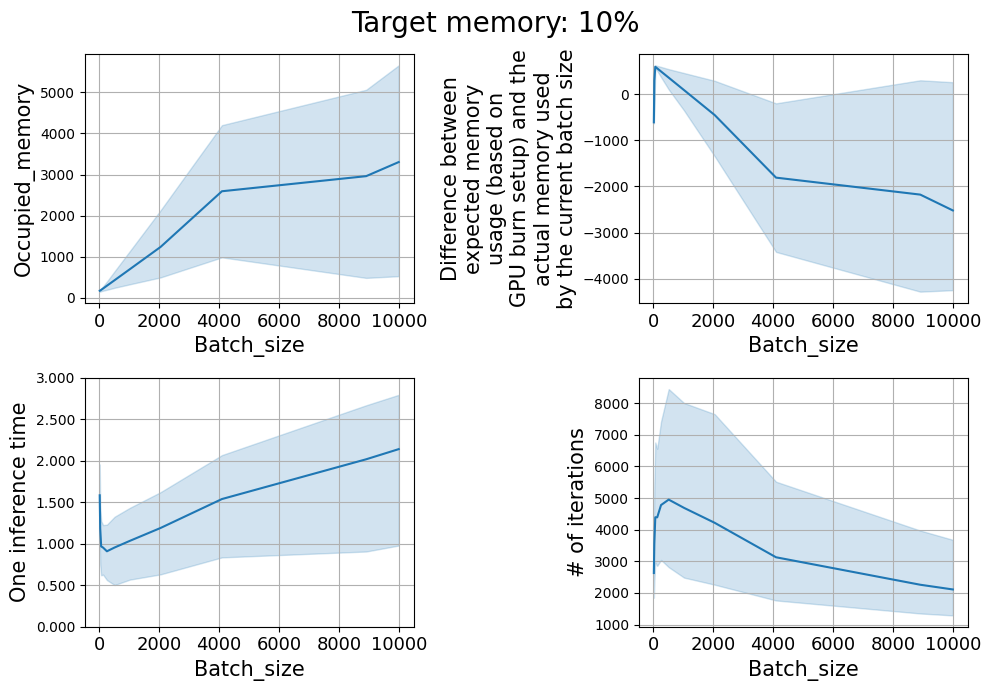

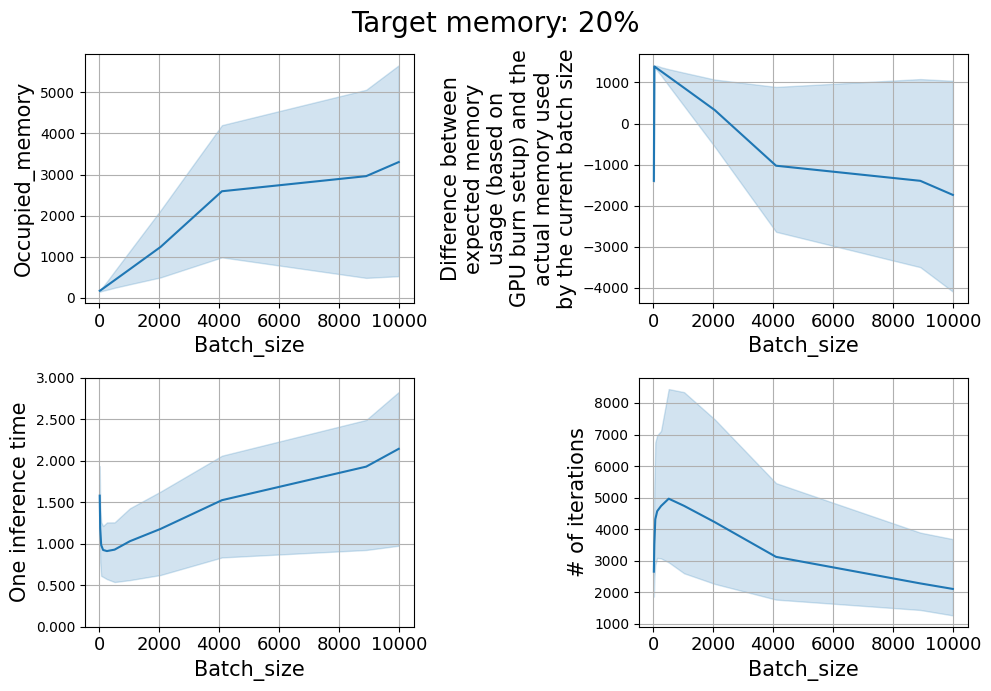

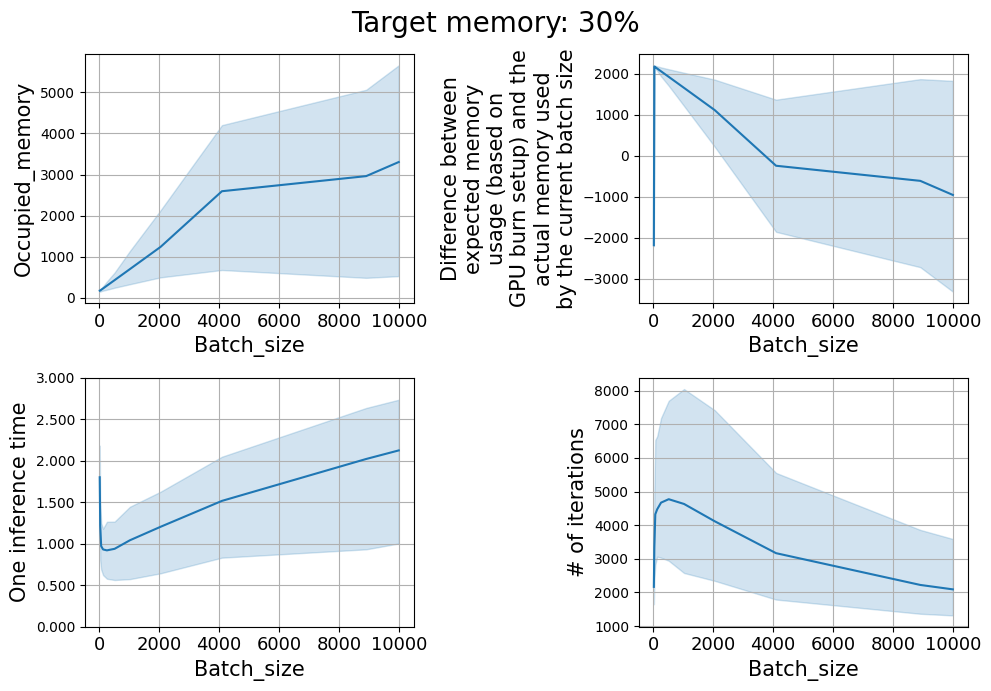

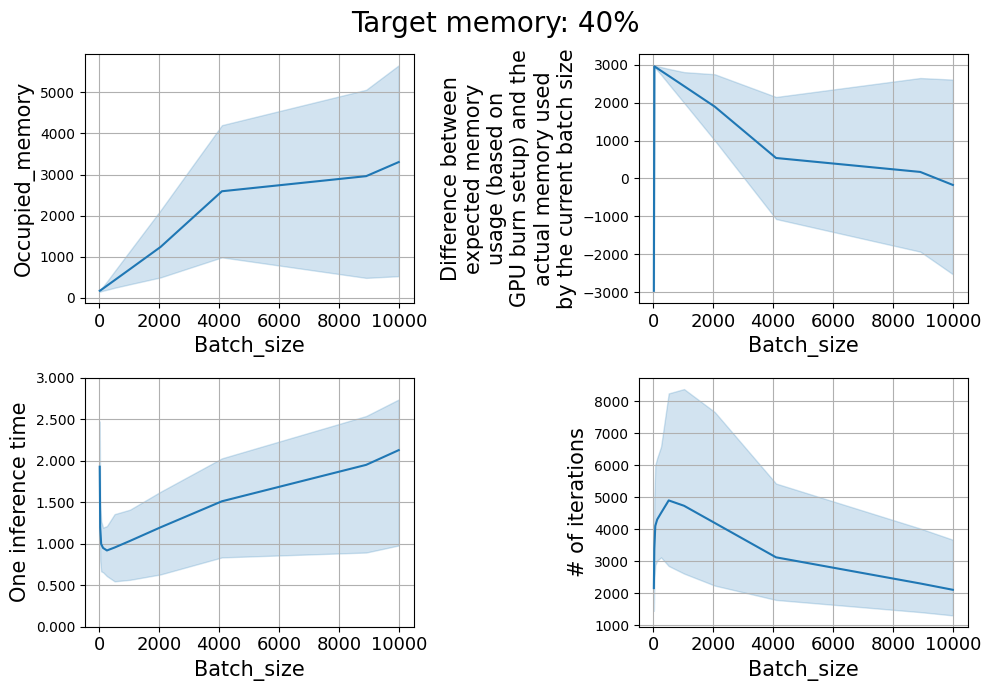

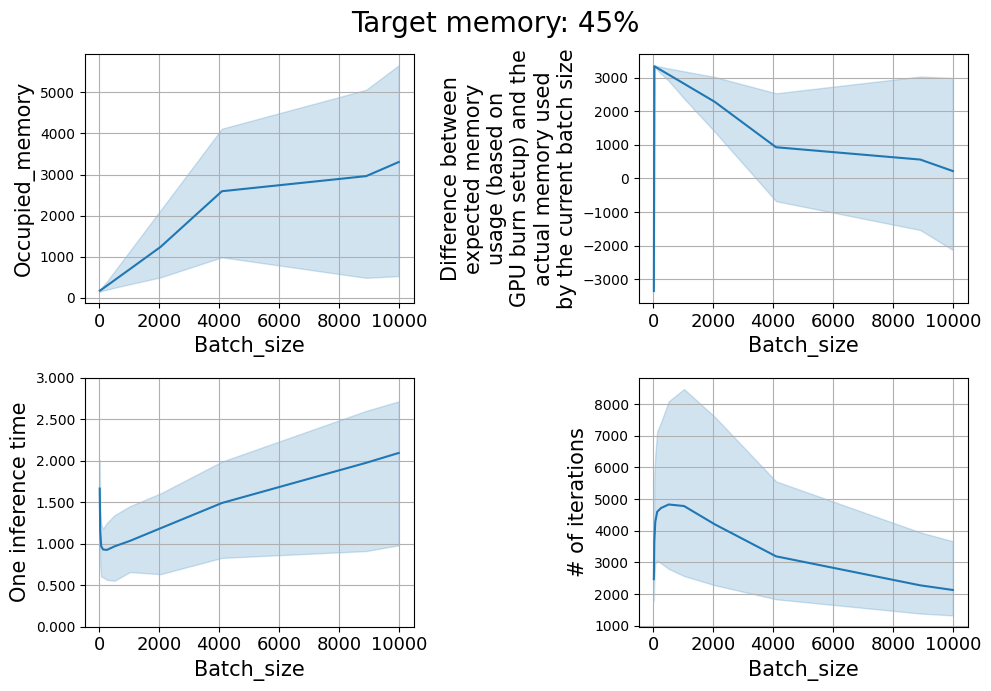

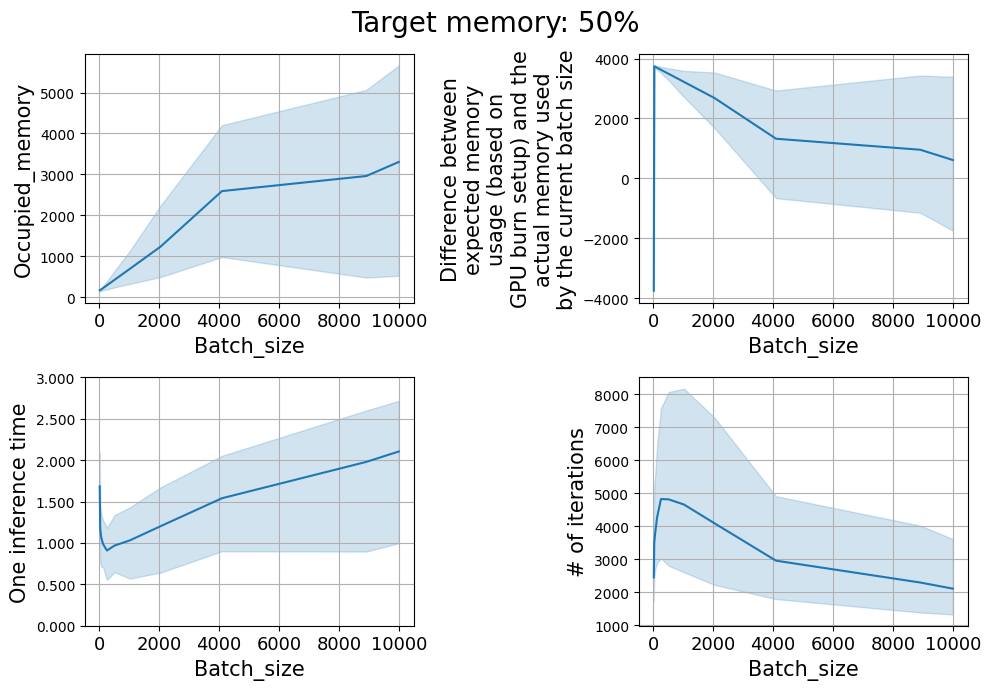

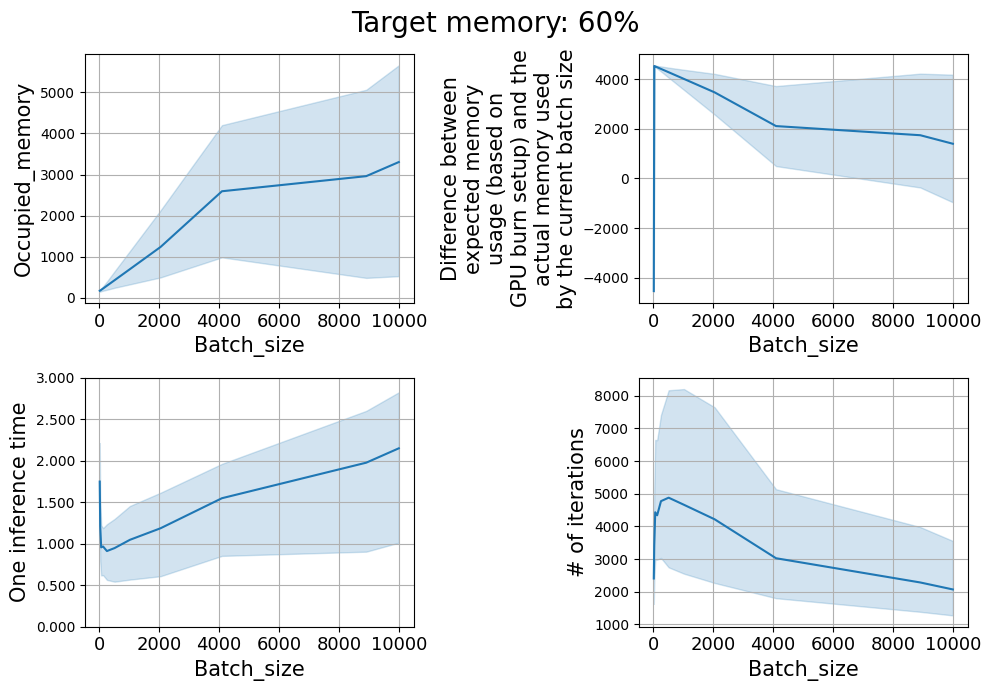

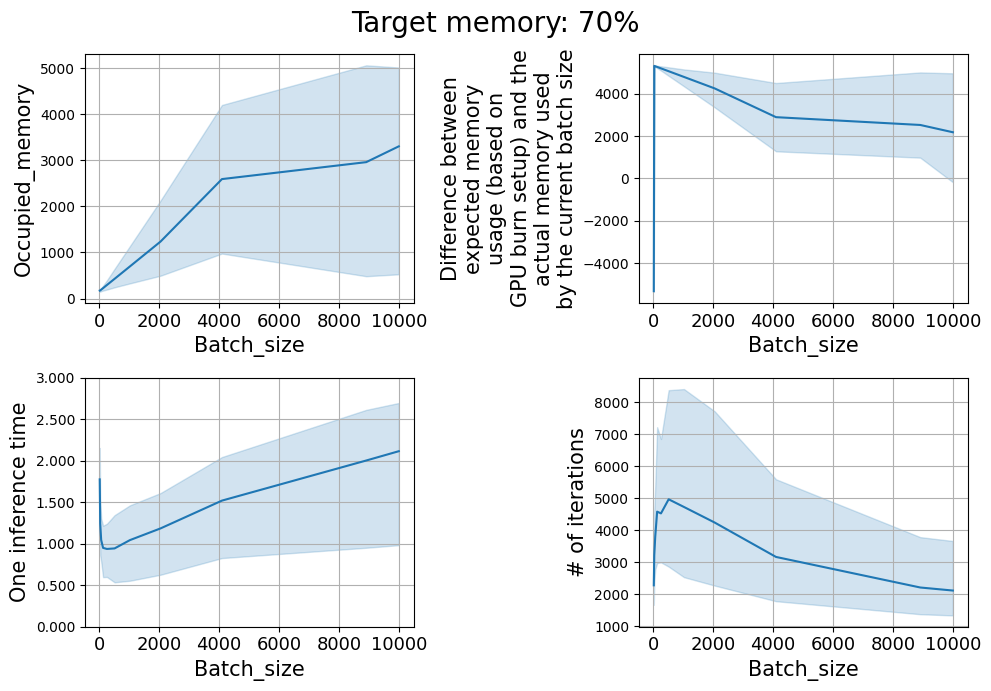

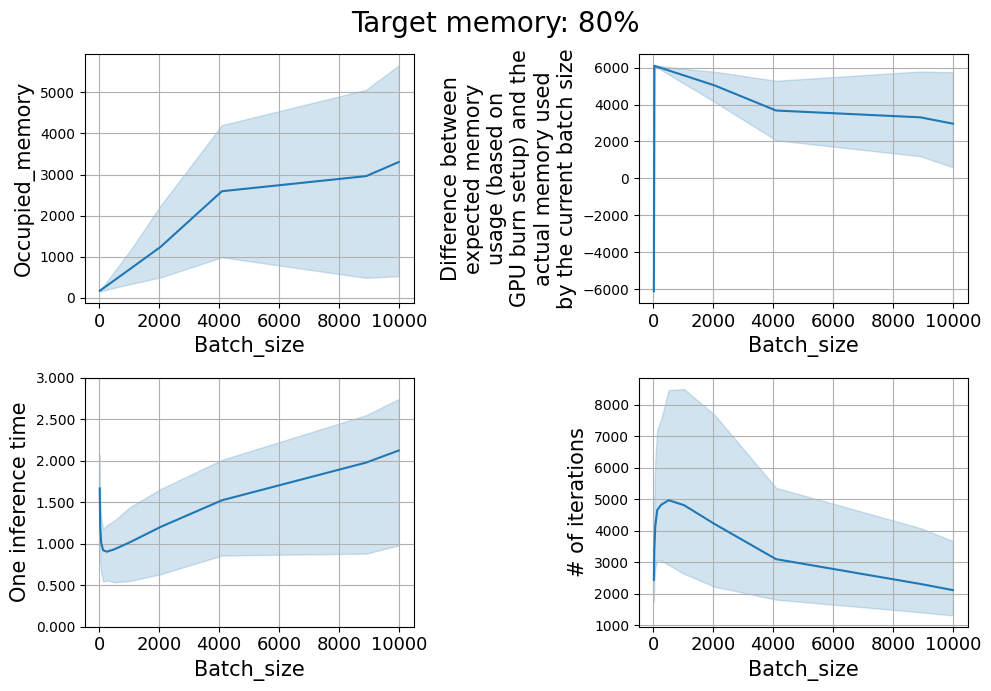

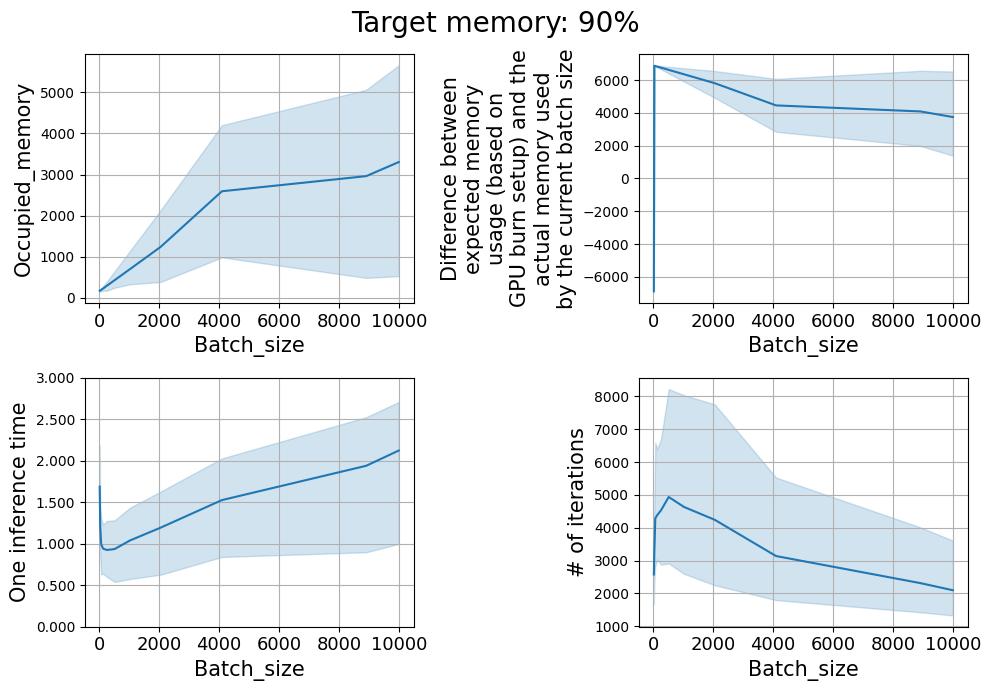

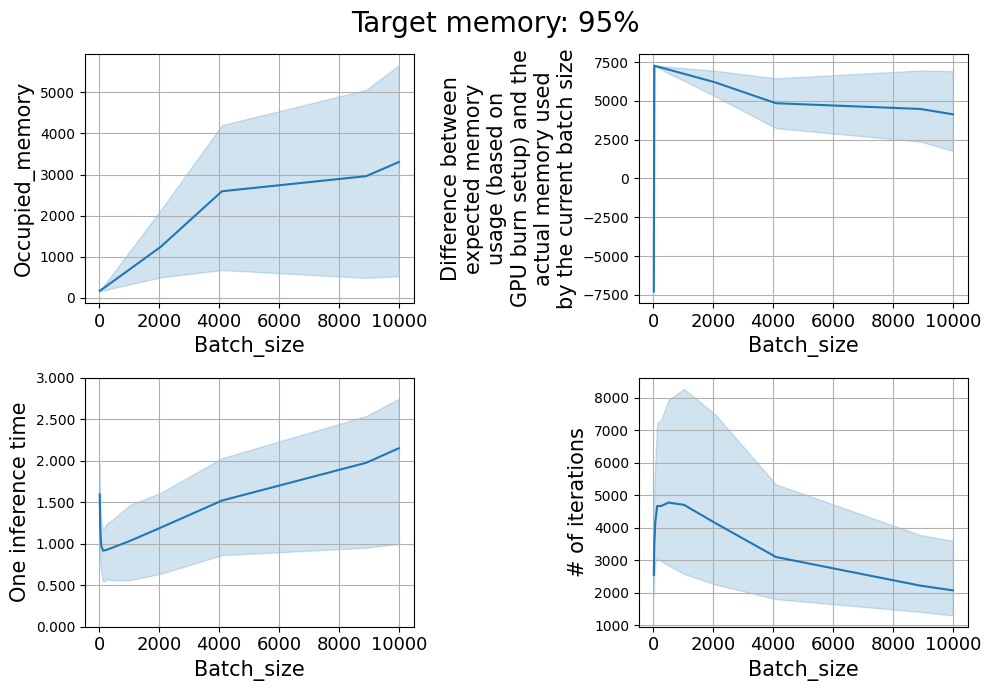

In [5]:

for mem in sorted(config['Target_memory'].unique()):
    fig, ax = plt.subplots(2,2, figsize=(10,7))
    data = config[config['Target_memory']==mem]
    sns.lineplot(data=data, x='Batch_size',y='Occupied_memory', ax=ax[0][0])
    ax[0][0].set_xlabel('Batch_size', fontsize=15)
    ax[0][0].set_ylabel('Occupied_memory', fontsize=15)
    ax[0][0].grid()
    ax[0][0].tick_params(axis='x', labelsize=13)
    ax[0][0].tick_params(axis='x', labelsize=13)

    sns.lineplot(data=data, x='Batch_size',y='Memory_epsilon', ax=ax[0][1])
    ax[0][1].set_xlabel('Batch_size', fontsize=15)
    ax[0][1].set_ylabel('Difference between\nexpected memory\nusage (based on\nGPU burn setup) and the\nactual memory used\nby the current batch size', fontsize=15)
    ax[0][1].grid()
    ax[0][1].tick_params(axis='x', labelsize=13)
    ax[0][1].tick_params(axis='x', labelsize=13)

    sns.lineplot(data=data, x='Batch_size',y='One_iteration_inference_time', ax=ax[1][0])
    ax[1][0].set_xlabel('Batch_size', fontsize=15)
    ax[1][0].set_ylabel('One inference time', fontsize=15)
    ax[1][0].grid()
    ax[1][0].tick_params(axis='x', labelsize=13)
    ax[1][0].tick_params(axis='x', labelsize=13)
    yticks = ax[1][0].get_yticks()
    ax[1][0].set_yticks(yticks)
    ax[1][0].set_yticklabels([f"{tick:.3f}" for tick in yticks])

    sns.lineplot(data=data, x='Batch_size',y='Iterations', ax=ax[1][1])
    ax[1][1].set_xlabel('Batch_size', fontsize=15)
    ax[1][1].set_ylabel('# of iterations', fontsize=15)
    ax[1][1].grid()
    ax[1][1].tick_params(axis='x', labelsize=13)
    ax[1][1].tick_params(axis='x', labelsize=13)

    fig.suptitle(f'Target memory: {mem}', fontsize=20)

    plt.tight_layout()


In [6]:
config.columns

Index(['Target_memory', 'Target_time', 'Neural_Network', 'Dataset',
       'Batch_size', 'Occupied_memory', 'Memory_epsilon',
       'One_iteration_inference_time', 'Iterations'],
      dtype='object')

In [21]:
idxs = config[config['Memory_epsilon']>0]\
    .groupby(by=['Target_memory', 'Target_time', 'Neural_Network', 'Dataset'])['Memory_epsilon']\
        .idxmin()
idxs.reset_index()
result = config.loc[idxs]

result[result['Target_memory']=='90%']

,Target_memory,Target_time,Neural_Network,Dataset,Batch_size,Occupied_memory,Memory_epsilon,One_iteration_inference_time,Iterations
458,90%,3600s,LeNet5,MNIST,10000,526.0,6525.5,0.998132,3606
456,90%,3600s,mnasnet0_5,CIFAR10,10000,3728.0,3323.5,2.662941,1351
389,90%,3600s,mobilenet_v2,CIFAR10,4096,4952.0,2099.5,2.143997,1679
457,90%,3600s,resnet18,CIFAR10,10000,5660.0,1391.5,2.707716,1329


In [ ]:
result.to_csv('./config.csv')